<a href="https://colab.research.google.com/github/AngelD40804/Machine-Learning-Fundamentals/blob/LAB8/LAB8_PREPARATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:

def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)


data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

In [ ]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
X_train.shape
y_train.shape

(7000, 1)

In [ ]:
no_training_epochs = 5

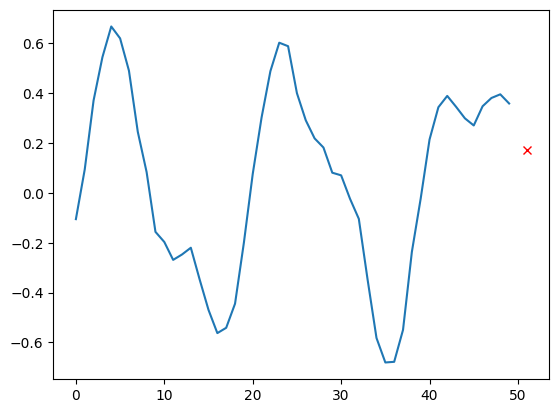

In [ ]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

In [ ]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))


In [ ]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [ ]:
model_linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])


Epoch 1/5
219/219 [==============================] - 3s 4ms/step - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0105 - val_mean_squared_error: 0.0105


In [ ]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

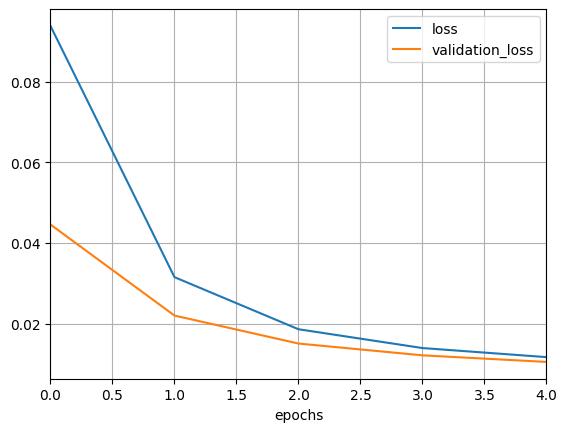

In [ ]:

plot_function(history_linear)

In [ ]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.01044786162674427
Test MSE:  0.01044786162674427


In [ ]:

model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [ ]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [ ]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])


Epoch 1/5
219/219 [==============================] - 8s 29ms/step - loss: 0.2146 - mean_squared_error: 0.2146 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 2/5
219/219 [==============================] - 7s 32ms/step - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 3/5
219/219 [==============================] - 6s 30ms/step - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.0621 - val_mean_squared_error: 0.0621
Epoch 4/5
219/219 [==============================] - 9s 41ms/step - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 5/5
219/219 [==============================] - 7s 32ms/step - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0455 - val_mean_squared_error: 0.0455


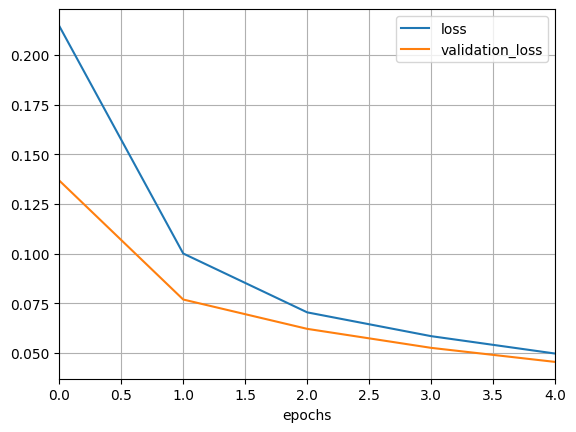

In [ ]:
plot_function(history_simple_rnn)


In [ ]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [ ]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])


In [ ]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 28s 116ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 2/5
219/219 [==============================] - 27s 123ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 3/5
219/219 [==============================] - 27s 122ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 4/5
219/219 [==============================] - 26s 120ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5/5
219/219 [==============================] - 25s 115ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


In [ ]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.00382206286303699
Test MSE:  0.00382206286303699


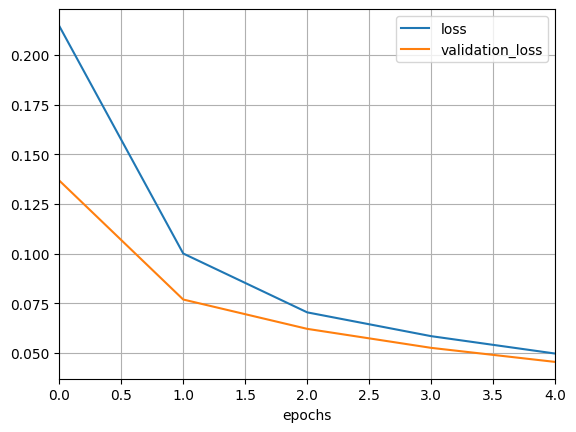

In [ ]:
plot_function(history_simple_rnn)